In [3]:
# This notebook compare the synonsymou mutations of patients with follicular lymphoma /wo
# Author: Yiyun
import mmap
from os import listdir
from os.path import join
from collections import Counter
import requests, sys
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

server = "https://grch37.rest.ensembl.org"

In [4]:
flymph = '../org_cov_maf/Lymph/merged_tumor_covmerged_Lymph.txt_filtered.maf'
finfo = '../anno_ref/PCAWG_sample_info.txt'

In [5]:
# get the count for syonymous mutations in patients
def get_count(dictionary):
    ls = [] # synonymous mutations list
    for k, v in dictionary.iteritems():
        for mut in v:
            ls.append(mut)
    
    return ls

In [6]:
# A rate limit function
# From forum https://stackoverflow.com/questions/667508/whats-a-good-rate-limiting-algorithm
def RateLimited(maxPerSecond):
    minInterval = 1.0 / float(maxPerSecond)
    def decorate(func):
        lastTimeCalled = [0.0]
        def rateLimitedFunction(*args,**kargs):
            elapsed = time.clock() - lastTimeCalled[0]
            leftToWait = minInterval - elapsed
            if leftToWait>0:
                time.sleep(leftToWait)
            ret = func(*args,**kargs)
            lastTimeCalled[0] = time.clock()
            return ret
        return rateLimitedFunction
    return decorate

# send the query to ensembl by position and variant, currently only work for SNP
# return a dictionary of organ-gene-mutation-overlap gene-consequence
@RateLimited(12)
def get_overlapping_cons(muts):
    ext = '/vep/human/region/'+muts+'/?'
    r = requests.get(server+ext,headers={"Content-Type" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    decoded = r.json()
    
    return decoded

        

Find all follicular lymphoma patients  
Note: None of the follicular lymphoma patients are from TCGA  
All from MALY-DE

In [7]:
# get patient tumor id with follicular lymphoma
lfp = []
with open(finfo,'r') as f:
    for lines in f:
        line_split = lines.split('\t')
        if 'Follicular lymphoma' in line_split[14]:
            lfp.append(line_split[0])

In [8]:
len(lfp) #number of follicular lymphoma patient

36

### Find the driver mut in patients

In [14]:
fdriver = '../anno_ref/icgc/driver_mutation/TableS3_panorama_driver_mutations_ICGC_samples.public.tsv'
# initiate a datastructure to store driver
driver_col = ['patient','ttype','chr','pos','res','alt','gene','driver','driver_statement','category','top_category','biallelic' ]
df_driver = pd.DataFrame(columns = driver_col)

with open(fdriver,'r') as driverf:
    for lines in driverf:
        line_split = lines.split('\t')
        patient_id, ttype,chrom,pos,res,alt,gene,driver,driver_statement,category, top_category, biallelic = line_split[0:13]
        
        a_series = pd.Series(line_split, index = df_driver.columns)

        if patient_id in lfp:
            df_driver = df_driver.append(a_series, ignore_index=True)

In [15]:
df_driver

,patient,ttype,chr,pos,res,alt,gene,driver,driver_statement,category,top_category,biallelic
0,02917220-6a7a-46a1-8656-907e96bef88e,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
1,03ad38a6-0902-4aaa-84a3-91ea88fa9883,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
2,15678c3d-ce61-454d-849e-1d4ca358909b,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
3,1d1eeba2-4d7b-4380-b0b6-26d246bc4158,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
4,232b7754-b3c3-4530-9d24-3af40d9b2816,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
5,3e7ccab5-5b1d-4147-b907-77cab8f0837e,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
6,3e94aa64-7dd3-4d63-a5de-b4050d3dfafa,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
7,4a4309b0-2aca-4d6a-ac50-039b28406bba,Lymph-BNHL,x,x,BCL6_IGH,x,BCL6,known,known,cis-activating_SV,SV,no\n
8,4d72d06d-b6af-4294-9eef-6e61e067761f,Lymph-BNHL,x,x,BCL2_IGH,x,BCL2,known,known,cis-activating_SV,SV,no\n
9,4e7cdeda-6dc1-4f17-b853-72a68e5aa7e1,Lymph-BNHL,x,x,BCL6_IGH,x,BCL6,known,known,cis-activating_SV,SV,no\n


### Find all Lymphoma patients and their silent mutations and other mutations

In [ ]:
df_mutbcl2 = get_dfmut('BCL2')
df_mutpim1 = get_dfmut('PIM1')

In [17]:
def get_dfmut(genename):
    # create empty pandas dataframe 
    cols = ['type','gene','fusion','sv','tumor_exp','normal_exp']
    df_mut = pd.DataFrame(columns = cols)

    # In mutations file, find the patients mutations
    with open(flymph,'r+b') as maf:
        next(maf)
        mmaf = mmap.mmap(maf.fileno(), 0)
        for line in iter(mmaf.readline, ""):
            lines_split = line.split('\t')
            mafg,chrm, sp,ep, strand, vc,vt = lines_split[0:7]
            gmut = lines_split[14]
            pt = lines_split[12]  

            # Add patients to dataframe
            if pt not in df_mut.index:
                df_mut.loc[pt,'type'] = None
            if pt in lfp:
                df_mut.loc[pt,'type'] = 'Follicular'
            else:
                df_mut.loc[pt,'type'] = 'Not Follicular'

            # Only record BCL2 mutations
            if mafg == genename:
                df_mut.loc[pt,'gene'] = mafg

                # Add mutation column
                if vc not in df_mut.columns:  df_mut.insert(2, vc, None)

                # Append mutation to cell
                if not pd.isnull(df_mut.loc[pt,[vc]].values):
                    df_mut.loc[pt,[vc]] += ','+gmut
                else:
                    df_mut.loc[pt,[vc]] = gmut

        mmaf.close()
    return df_mut

In [87]:
df_mut[(df_mut['gene'] == 'PIM1')]['Silent']

eba6d269-27f8-4e50-b59a-5d639bdd5cff                                   g.chr6:37140782G>A
1b1780d5-06da-40ee-9e15-02631a68027b                                                  NaN
a29278af-7ecf-403e-b6a9-623ea7879d05                                   g.chr6:37138424C>T
e89e9c69-ffcd-4a4c-818d-1dee43ddc76a                                                  NaN
fa676301-902f-473f-8313-5bff34ae549a                                                  NaN
07835447-5d7e-4828-80fd-89b063989c9a    g.chr18:60985573G>A,g.chr6:37138934C>T,g.chr6:...
0e7f46ca-6f5c-4538-b6d6-00af65d57fcf                                                  NaN
124d5b04-4588-44c3-9c00-61e064cf1bdb                g.chr6:37139209G>A,g.chr6:37139242G>A
140d5fa9-afbe-444e-a7e7-6a4cb4ab2923                                                  NaN
1a4633c4-72a0-4e30-8c4c-345e04337627                                   g.chr6:37138805C>T
41dba8d1-8aad-474c-a82b-20b28ab818bd                                  g.chr18:60985834C>T
461df2ae-f

In [83]:
# This shows all BCL silent mutations of patients
df_mut_bcls = df_mut[df_mut['Silent'].notnull()]['Silent'].str.split(',', expand=True)

### Count synonymous mutations in follicular lymphoma/ non follicular lymphoma patient dictionary

In [9]:
fsilent = df_mut[(df_mut['gene'] == 'BCL2') & (df_mut['type'] == 'Follicular')]['Silent'].values.tolist()
ls = []
for v in fsilent:
    if not pd.isnull(v):
        mutation = re.findall('g.chr\d+:\d+[A-Z]+>[A-Z]+', v)
        for k in mutation:
            ls.append(k)

print "%d synonymous mutations in %d follicular lymphoma patients"%(len(ls),len(lfp))

33 synonymous mutations in 36 follicular lymphoma patients


### Get overlapping genes of synonymous mutations in follicular lymphoma patientss

In [10]:
# This is the same code as above, but for all synonymous mutations
fsilent = df_mut[df_mut['gene'] == 'BCL2']['Silent'].values.tolist()
ls = []
for v in fsilent:
    if not pd.isnull(v):
        mutation = re.findall('g.chr\d+:\d+[A-Z]+>[A-Z]+', v)
        for k in mutation:
            ls.append(k)

In [11]:

# get overlapping gene from the consequence of mutation
def get_cons(res,name):
    lm = []
    global dmut, mut
    for cons in res:
        # if it's not the target gene, append to dictionary
        if cons['gene_symbol'] != name: 
            ovpgene = cons['gene_symbol']
            lm.append(ovpgene)
    if lm:
        print "Found overlapping gene %s for %s"%(str(set(lm)),mut)
    else:
        print "No overlapping gene found for %s"%(mut)

In [14]:
# get the consequence of synonymous mutations in follicular lymphoma patientss
for muts in ls:
    chrom = re.findall(r'\d+', muts.split(':')[0])[0]
    startp = re.findall(r'\d+', muts.split(':')[1])[0]
    var = muts[-1]
    mut = str(chrom)+':'+str(startp)+'-'+str(startp)+'/'+str(var)
    res = get_overlapping_cons(mut) 
    cdnapos = res[0]['transcript_consequences'][0]['cdna_end']
    proteinpos = res[0]['transcript_consequences'][0]['protein_end']
    cdspos = res[0]['transcript_consequences'][0]['cds_end']
    codon = res[0]['transcript_consequences'][0]['codons']
    aa = res[0]['transcript_consequences'][0]['amino_acids']
    allele = res[0]['allele_string']
    reg_impact = res[0]['regulatory_feature_consequences'][0]['impact']
    reg_term = res[0]['regulatory_feature_consequences'][0]['consequence_terms']
    reg_type = res[0]['regulatory_feature_consequences'][0]['biotype']
    print mut
    print proteinpos,cdspos,allele
    print reg_impact,reg_term,reg_type
    print aa
#     get_cons(res,'BCL2')

18:60985876-60985876/T
8 24 C/T
MODIFIER [u'regulatory_region_variant'] promoter
G
18:60985444-60985444/T
152 456 C/T
MODIFIER [u'regulatory_region_variant'] promoter
E
18:60985471-60985471/A
143 429 G/A
MODIFIER [u'regulatory_region_variant'] promoter
N
18:60985492-60985492/T
136 408 C/T
MODIFIER [u'regulatory_region_variant'] promoter
E
18:60985573-60985573/A
109 327 G/A
MODIFIER [u'regulatory_region_variant'] promoter
R


KeyboardInterrupt: 

In [15]:
df_mut

,type,gene,3'UTR,De_novo_Start_OutOfFrame,Missense_Mutation,IGR,5'Flank,De_novo_Start_InFrame,5'UTR,Silent,Intron,fusion,sv,tumor_exp,normal_exp
Tumor_Sample_Barcode,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
04b570c2-3224-4e9b-81cc-089b4a7ff07a,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
05da3161-1444-4188-914d-19762de3a443,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
08f7812b-0d74-42ba-985b-d0a027e8a80c,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
0b6cd7df-6970-4d60-b7b5-85002a7d8781,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
1157a548-6770-4c89-a84c-bcf6f0e96ea8,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
1193a9c4-5aab-4cd7-a690-60c96bd1172d,Not Follicular,NaN,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
132f7f2a-b902-4343-aa08-cf6a7af10b9a,Not Follicular,BCL2,None,None,None,None,"g.chr18:60987915T>C,g.chr18:60988035C>G,g.chr1...",g.chr18:60986212A>C,"g.chr18:60986154A>G,g.chr18:60986235T>C,g.chr1...",g.chr18:60985876C>T,"g.chr18:60983860A>G,g.chr18:60983904A>G,g.chr1...",NaN,NaN,NaN,NaN
140d6ef7-0217-4d16-9add-215d0d14ba06,Not Follicular,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14cbcbb1-028b-471a-bb4f-8b29cfa5e4eb,Not Follicular,BCL2,None,None,None,None,NaN,NaN,NaN,NaN,g.chr18:60819992G>A,NaN,NaN,NaN,NaN


In [72]:
input_col = ['Hugo_Symbol','Sample_ID','Protein_Change','Mutation_Type']
df_input_plot = pd.DataFrame(columns = input_col)
l1 = []
l2 = []
l3 = []
l4 = []

for c in df_mut.iloc[:,2:10].columns:
    for s,v in df_mut[df_mut[c].notnull()][c].iteritems():
        for mut in [v]:
            mutation = re.findall('g.chr\d+:\d+[A-Z]+>[A-Z]+', v)
            for muts in mutation:
                chrom = re.findall(r'\d+', muts.split(':')[0])[0]
                startp = re.findall(r'\d+', muts.split(':')[1])[0]
                var = muts[-1]
                mut = str(chrom)+':'+str(startp)+'-'+str(startp)+'/'+str(var)
                res = get_overlapping_cons(mut)
                try:
                    aa = res[0]['transcript_consequences'][0]['amino_acids']
                    print res[0]['transcript_consequences']
                    proteinpos = res[0]['transcript_consequences'][0]['protein_end']
                    if '/' in aa:
                        rp = aa.split('/')[0]
                        mp = aa.split('/')[1]
                        pchange = str(rp)+str(proteinpos)+str(mp)
                    else:
                        pchange = str(aa)+str(proteinpos)+str(aa)
                except KeyError:
                    print muts, c
                    continue

                l1.append('BCL2')
                l2.append(s)
                l3.append(pchange)
                l4.append(c)

g.chr18:60793942A>C 3'UTR
g.chr18:60793510T>C 3'UTR
g.chr18:60793704G>A 3'UTR
g.chr18:60794375G>A 3'UTR
g.chr18:60794650G>A 3'UTR
g.chr18:60794752T>C 3'UTR
g.chr18:60794785A>G 3'UTR
g.chr18:60794861C>T 3'UTR
g.chr18:60794942C>G 3'UTR
g.chr18:60795751C>G 3'UTR
g.chr18:60986924G>C De_novo_Start_OutOfFrame
g.chr18:60986160A>C De_novo_Start_OutOfFrame
g.chr18:60986716G>T De_novo_Start_OutOfFrame
g.chr18:60986100T>C De_novo_Start_OutOfFrame
g.chr18:60986272C>T De_novo_Start_OutOfFrame
g.chr18:60986100T>C De_novo_Start_OutOfFrame
g.chr18:60987124C>A De_novo_Start_OutOfFrame
g.chr18:60986107A>T De_novo_Start_OutOfFrame
g.chr18:60986153T>C De_novo_Start_OutOfFrame
[{u'hgnc_id': 990, u'gene_symbol_source': u'HGNC', u'cdna_start': 986, u'impact': u'MODERATE', u'protein_start': 29, u'consequence_terms': [u'missense_variant'], u'codons': u'gaG/gaC', u'gene_symbol': u'BCL2', u'sift_score': 0.73, u'polyphen_score': 0.022, u'variant_allele': u'G', u'cds_end': 87, u'cds_start': 87, u'polyphen_predicti

In [42]:
input_col = ['Hugo_Symbol','Sample_ID','Protein_Change','Mutation_Type']
df_input_plot = pd.DataFrame(columns = input_col)
l1 = []
l2 = []
l3 = []
l4 = []

for s,v in df_mut[df_mut['Silent'].notnull()]['Silent'].iteritems():
    for mut in [v]:
        mutation = re.findall('g.chr\d+:\d+[A-Z]+>[A-Z]+', v)
        for muts in mutation:
            chrom = re.findall(r'\d+', muts.split(':')[0])[0]
            startp = re.findall(r'\d+', muts.split(':')[1])[0]
            var = muts[-1]
            mut = str(chrom)+':'+str(startp)+'-'+str(startp)+'/'+str(var)
            res = get_overlapping_cons(mut)

            aa = res[0]['transcript_consequences'][0]['amino_acids']
            proteinpos = res[0]['transcript_consequences'][0]['protein_end']
            pchange = str(aa)+str(proteinpos)+str(aa)

            l1.append('BCL2')
            l2.append(s)
            l3.append(pchange)
            l4.append('Silent')
            
df_input_plot['Hugo_Symbol'] = l1
df_input_plot['Sample_ID'] = l2
df_input_plot['Protein_Change'] = l3
df_input_plot['Mutation_Type'] = l4

In [74]:
df_input_plot.to_csv('track_input.txt', sep = '\t', index = None)

In [73]:
df_input_plot['Hugo_Symbol'] = l1
df_input_plot['Sample_ID'] = l2
df_input_plot['Protein_Change'] = l3
df_input_plot['Mutation_Type'] = l4

### Get fusion break point

In [ ]:
ffus = '../data/anno_refs/pcawg_fusion.tsv'
dffus = pd.read_csv(ffus, sep= '\t')
dffus = dffus.set_index('wgs_aliquot_id')
# select BCL2 fusion
# dfbcl2 = dffus[(dffus['gene_id1']=='ENSG00000171791') | (dffus['gene_id2'] == 'ENSG00000171791')]

NameError: name 'pd' is not defined

In [15]:
# Select dataframe b overlapping patients
idx1 = dffus.index
idx2 = df_mut.index
interidx = idx1.intersection(idx2)

In [16]:
dffus_lymph = dffus.loc[interidx]
dfbcl2 = dffus_lymph[(dffus_lymph['gene_id1']=='ENSG00000171791') | (dffus_lymph['gene_id2'] == 'ENSG00000171791')]

In [17]:
for p in dfbcl2.index:
    if not isinstance(dfbcl2.loc[p,'class'],str):
        df_mut.loc[p,'fusion'] = "Y"
        df_mut.loc[p,'fusion_class'] = dfbcl2.loc[p,'class'].values[0]
        df_mut.loc[p,'fusion_point'] = int(dfbcl2.loc[p,'break1'][0])
    else:
        df_mut.loc[p,'fusion'] = "Y"
        df_mut.loc[p,'fusion_class'] = dfbcl2.loc[p,'class']
        df_mut.loc[p,'fusion_point'] = int(dfbcl2.loc[p,'break1'])

In [18]:
df_mut[df_mut['fusion'] == 'Y'][['type','Silent','fusion','fusion_class','fusion_point']]

,type,Silent,fusion,fusion_class,fusion_point
2c3ada8b-9650-4859-9857-43209c0f7cea,Not Follicular,g.chr18:60985833G>A,Y,SV independent,60843599.0
3e94aa64-7dd3-4d63-a5de-b4050d3dfafa,Follicular,g.chr18:60985833G>A,Y,composite,60812505.0
ebe0ed67-2d3f-45cd-8f9b-4912595b16a0,Follicular,g.chr18:60985834C>T,Y,composite,60794689.0
f2c08ac1-4755-4c36-a11d-338d8df9fa0d,Follicular,NaN,Y,composite,60794689.0
f60007b3-0603-4ad1-8b47-d2d4c4c621e4,Follicular,g.chr18:60985444C>T,Y,composite,60847806.0


### Get structure variant

In [19]:
sv_dir = '/gpfs/scratch/yur97/yur97/gitlab/pcawg-to-mutsigcv/anno_ref/icgc/open'
lsv = listdir(sv_dir)

for f in lsv:
    if f.endswith('bedpe'):
        patient = f.split('.')[0]
        dfsv = pd.read_csv(join(sv_dir,f), sep = '\t')
        df_bcl = dfsv[((dfsv['chrom1']==18) & (dfsv['start1'] >60790579) & (dfsv['end1'] <60987361)) | \
                  ((dfsv['chrom2']==18) & (dfsv['start2'] >60790579) & (dfsv['end2'] <60987361))]
        
        
        if not df_bcl.empty:
            if (df_bcl['chrom2'] == 18).all():
                df_mut.loc[patient,'sv'] = 'Y'
                df_mut.loc[patient,'sv_class'] = df_bcl['svclass'].tolist()[0]
                df_mut.loc[patient,'sv_start'] = df_bcl['start2'].tolist()[0]
                df_mut.loc[patient,'sv_end'] = df_bcl['end2'].tolist()[0]
            elif (df_bcl['chrom1'] == 18).all():
                df_mut.loc[patient,'sv'] = 'Y'
                df_mut.loc[patient,'sv_class'] = df_bcl['svclass'].tolist()[0]
                df_mut.loc[patient,'sv_start'] = df_bcl['start1'].tolist()[0]
                df_mut.loc[patient,'sv_end'] = df_bcl['end1'].tolist()[0]

In [20]:
df_fusion = df_mut[df_mut['fusion'] == 'Y'][['type','Silent','fusion_class','fusion_point']]
df_fusion['fusion_point'] = df_fusion['fusion_point'].astype('int64')

In [21]:
df_structure = df_mut[df_mut['sv'] == 'Y'][['type','Silent','sv_class','sv_start']]
df_structure['sv_start'] = df_structure['sv_start'].astype('int64')

In [22]:
df_structure = df_structure.iloc[:-1,:]

### Check the expression of BCL2 and AID/ sno gene and RPL gene  
RP11-28F1.2 ENSG00000267701 ENST00000588307.1  
RP11-299P1.2 ENSG00000267766 	ENST00000587475.1  
snoU13 ENSG00000238988 ENST00000458827.1	
Expect: same expression?
If not same expression then why?
I hope to find which one express, so that it could be related to function  
['ENSG00000267701','ENSG00000267766','ENSG00000238988']
['ENST00000588307.1','ENST00000587475.1','ENST00000458827.1']
AID: ENSG00000111732
BCL2: ENSG00000171791

In [23]:
df_mut = df_mut.iloc[1:,:]

In [24]:
df_fusion.index

Index([u'2c3ada8b-9650-4859-9857-43209c0f7cea',
       u'3e94aa64-7dd3-4d63-a5de-b4050d3dfafa',
       u'ebe0ed67-2d3f-45cd-8f9b-4912595b16a0',
       u'f2c08ac1-4755-4c36-a11d-338d8df9fa0d',
       u'f60007b3-0603-4ad1-8b47-d2d4c4c621e4'],
      dtype='object')

In [27]:
df_exp = pd.read_csv(join(exp_dir,gene_tophat), sep = '\t')

In [28]:
df_exp_bcl2 = df_exp[df_exp['feature'].str.contains('ENSG00000171791')]
df_exp_aid = df_exp[df_exp['feature'].str.contains('ENSG00000111732')]

In [29]:
df_exp_info = pd.read_csv(join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [31]:
df_mut_bcls = df_mut[df_mut['Silent'].notnull()]['Silent']

In [81]:
col = ['q1','q2','q3','q4']
df_stat = pd.DataFrame(0,index = ['bcl2', 'aid'],columns = col)

In [86]:
col = ['q1','q2','q3','q4']
df_stat_bclq4 = pd.DataFrame(0,index = ['aid'],columns = col)

In [96]:
list_bcl2 = []
list_aid = []
for mut in set(ls):
    tit = mut
    # get patients with mutation:
    for rows in df_mut_bcls:
        if mut in rows:
            list_patients = df_mut_bcls[df_mut_bcls == rows].index.tolist()
            
            list_exp_syn = []
            list_exp_other = []
            list_exp_syn_aid = []
            list_exp_other_aid = []
            for pat in list_patients:
                if pat in df_fusion.index.tolist():
                    tit += ' Fusion with IgG'
                if pat in df_structure.index.tolist():
                    tit += ' SV'
                exp_id = df_exp_info[df_exp_info['wgs_aliquot_id'] == pat]['aliquot_id'].values
                exp_val = df_exp_bcl2[exp_id].values
                exp_val_aid = df_exp_aid[exp_id].values
                if exp_val:
                    list_exp_syn.append(exp_val[0][0])
                    list_exp_syn_aid.append(exp_val_aid[0][0])
                    if pat in df_structure.index.tolist():
                        list_bcl2.append(exp_val[0][0])
                        list_aid.append(exp_val_aid[0][0])
            
            for p in df_mut.index.tolist():
                if p not in list_patients:
                    exp_id = df_exp_info[df_exp_info['wgs_aliquot_id'] == p]['aliquot_id'].values
                    exp_val = df_exp_bcl2[exp_id].values
                    exp_val_aid = df_exp_aid[exp_id].values
                    if exp_val:
                        list_exp_other.append(exp_val[0][0])
                        list_exp_other_aid.append(exp_val_aid[0][0])
    
    dict_syn = {'syn_bcl2': list_exp_syn, 'syn_aid': list_exp_syn_aid}
    dict_other = {'other_bcl2': list_exp_other, 'other_aid': list_exp_other_aid}
    df_syn = pd.DataFrame(dict_syn) 
    df_other = pd.DataFrame(dict_other) 
    
    col = ['q1','q2','q3','q4']
    df_stat = pd.DataFrame(0,index = ['bcl2', 'aid'],columns = col)
    other25 = df_other.quantile(.25)['other_bcl2']
    other50 = df_other.quantile(.50)['other_bcl2']
    other75 = df_other.quantile(.75)['other_bcl2']
    other25aid = df_other.quantile(.25)['other_aid']
    other50aid = df_other.quantile(.50)['other_aid']
    other75aid = df_other.quantile(.75)['other_aid']
    for x in df_syn['syn_bcl2']:
        if x < other25:
            df_stat.loc['bcl2','q1'] +=1
        elif x >= other25 and x < other50:
            df_stat.loc['bcl2','q2'] +=1
        elif x >= other50 and x < other75:
            df_stat.loc['bcl2','q3'] +=1
        elif x >= other75:
            df_stat.loc['bcl2','q4'] +=1
            for x in df_syn['syn_aid']:
                if x < other25aid:
                    df_stat_bclq4.loc['aid','q1'] +=1
                elif x >= other25aid and x < other50aid:
                    df_stat_bclq4.loc['aid','q2'] +=1
                elif x >= other50aid and x < other75aid:
                    df_stat_bclq4.loc['aid','q3'] +=1
                elif x >= other75aid:
                    df_stat_bclq4.loc['aid','q4'] +=1
    for x in df_syn['syn_aid']:
        if x < other25aid:
            df_stat.loc['aid','q1'] +=1
        elif x >= other25aid and x < other50aid:
            df_stat.loc['aid','q2'] +=1
        elif x >= other50aid and x < other75aid:
            df_stat.loc['aid','q3'] +=1
        elif x >= other75aid:
            df_stat.loc['aid','q4'] +=1


    
#     ax1 = df_other.plot(kind='scatter', x='other_bcl2', y='other_aid', color='r', alpha = 0.5, title = tit )    
#     ax2 = df_syn.plot(kind='scatter', x='syn_bcl2', y='syn_aid', color='g', ax=ax1)
#     plt.plot([df_other.quantile(.25)['other_bcl2'], df_other.quantile(.25)['other_bcl2']], [0, 150], '--')
#     plt.plot([df_other.quantile(.50)['other_bcl2'], df_other.quantile(.50)['other_bcl2']], [0, 150], '--')
#     plt.plot([df_other.quantile(.75)['other_bcl2'], df_other.quantile(.75)['other_bcl2']], [0, 150], '--')
#     plt.plot([0, 150],[df_other.quantile(.25)['other_aid'], df_other.quantile(.25)['other_aid']], '--')
#     plt.plot([0, 150],[df_other.quantile(.50)['other_aid'], df_other.quantile(.50)['other_aid']], '--')
#     plt.plot([0, 150],[df_other.quantile(.75)['other_aid'], df_other.quantile(.75)['other_aid']], '--')
#     plt.show()
            

In [97]:
list_bcl2
list_aid
dict_lexp = {'bcl2': list_bcl2, 'aid': list_aid}
df_lexp = pd.DataFrame(dict_lexp) 

In [99]:
list_aid

[0.66610017733000004,
 0.44642940620800003,
 4.14261165987,
 4.14261165987,
 19.049046671099997,
 0.84703191540000011,
 4.1966716946199991,
 5.7113879087999999,
 0.0,
 4.1966716946199991,
 3.7197345452800006,
 0.44642940620800003,
 2.9579352208599996,
 2.9579352208599996,
 2.9579352208599996,
 0.44642940620800003,
 3.7111029606199999,
 3.7111029606199999,
 5.7113879087999999]

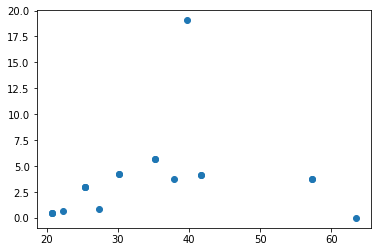

In [98]:
# scatter plot
plt.scatter(df_lexp['bcl2'], df_lexp['aid'])
plt.show()

In [84]:
df_stat_bclq4

,q1,q2,q3,q4
aid,0,2,6,7


In [162]:
df_exp_bcl2

,feature,00055bad-54b7-4898-a9ae-3dd8036e62d3,0031d433-d703-4b2c-9fdf-2920008eb457,0046fef7-052b-4d4e-b264-b3bf2e2699b1,008292c8-81f5-4930-b179-a198686fc79b,00b6a02c-1b13-4b9a-b63f-400230f83973,010d78d6-f2fa-4112-8ebc-c41082e6ddcc,01253f54-c6b4-48c0-83da-84b73e12b6af,01370d42-f75c-4532-9b9c-24ff7302b033,0148a96e-972e-4762-9a75-ee2791dc3d95,...,fd4eb5ce-47b3-4c31-b9c5-ca08b3f580db,fe39a1a6-f141-4501-849b-19929c7c25de,feb1dc41-7013-4d2a-8b69-45830c456f7d,febead73-3b12-44e6-8bab-a7cfa7bf1129,fecacab2-ccf7-4c94-8dcd-fd319a3e630a,fef90a5d-49de-4277-a927-e6cfe7b3936e,ff0461fe-4c5f-476c-aade-de30a5c12a15,ff555cad-2ab4-425b-83b5-c56ac20905a8,ff781a4f-7281-4195-880f-3df099a401cc,ffac8b7c-64ac-429c-800b-fb2a5b6deefe
13279,ENSG00000171791.10,1.907678,0.58942,1.155672,5.457458,10.820279,2.416373,0.259505,9.90359,1.280249,...,14.56363,26.291428,13.216233,0.607463,62.128938,2.103286,7.782993,24.388436,1.140305,0.454289


In [ ]:
def get_expression(gene, trp):
    df_exp = pd.DataFrame()
    for filename in [gene_gtex, gene_tophat, gene_tophatuq,transcript]:
        flag = 0 
        with open(join(exp_dir,filename),'r+b') as fexp:
            mexp = mmap.mmap(fexp.fileno(),0)
            for line in iter(mexp.readline, ""):
                name = line.split('\t')[0].split('.')[0]
                if name == gene or name == trp:
                    if flag == 0:
                        exp = line.split('\t')[1:]
                        exp = np.array([float(v) for v in exp])
                        df_tmp = pd.DataFrame()
                        df_tmp[filename] = exp

                        colname = df_exp.columns.values.tolist()
                        if not colname:
                            colname = []
                        colname.append(filename)
                        df_exp = pd.concat([df_exp,df_tmp], axis = 1, ignore_index = True)
                        df_exp.columns = colname
                    else:
                        print "ERROR FIND DUPLICATE GENE/TRANSCRIPT"
            mexp.close()
            
    return df_exp

In [ ]:
def get_expression_CCLE(gene):
    fn = '../anno_ref/CCLE/CCLE_RNAseq_rsem_genes_tpm_20180929.txt'
    df_exp = pd.DataFrame()
    flag = 0 
    with open(fn,'r+b') as fexp:
        mexp = mmap.mmap(fexp.fileno(),0)
        for line in iter(mexp.readline, ""):
            name = line.split('\t')[0].split('.')[0]
            if name == gene:
                if flag == 0:
                    exp = line.split('\t')[2:]
                    exp = np.array([float(v) for v in exp])
                    df_tmp = pd.DataFrame()
                    df_tmp[fn] = exp

                    colname = df_exp.columns.values.tolist()
                    if not colname:
                        colname = []
                    colname.append(fn)
                    df_exp = pd.concat([df_exp,df_tmp], axis = 1, ignore_index = True)
                    df_exp.columns = colname
                else:
                    print "ERROR FIND DUPLICATE GENE/TRANSCRIPT"
        mexp.close()

    return df_exp

In [ ]:
exp_RP28_ccle = get_expression_CCLE('ENSG00000267701')

In [ ]:
exp_RP28_ccle.mean()

In [ ]:
exp_RP29_ccle = get_expression_CCLE('ENSG00000267766')
exp_RP29_ccle.mean()

In [ ]:
exp_sno_ccle = get_expression_CCLE('ENSG00000238988')
exp_sno_ccle.mean()

In [ ]:
exp_bcl2_ccle = get_expression_CCLE('ENSG00000171791')
exp_bcl2_ccle.mean()

In [ ]:
exp_RP28 = get_expression('ENSG00000267701','ENST00000588307')

In [29]:
exp_RP29 = get_expression('ENSG00000267766','ENST00000587475')

In [30]:
exp_sno = get_expression('ENSG00000238988','ENST00000458827')

In [31]:
exp_bcl2 = get_expression('ENSG00000171791', 'ENST00000398117')

In [32]:
exp_bcl2.mean()

GTEx.tophat2.gene.fpkm.tsv                4.166680
tophat_star_fpkm.v2.aliquot_gl.tsv        8.855226
tophat_star_fpkm_uq.v2_aliquot_gl.tsv     9.652404
pcawg.rnaseq.transcript.expr.tpm.tsv     13.553974
dtype: float64

In [33]:
exp_RP28.mean()

GTEx.tophat2.gene.fpkm.tsv               0.435999
tophat_star_fpkm.v2.aliquot_gl.tsv       1.485859
tophat_star_fpkm_uq.v2_aliquot_gl.tsv    1.639796
dtype: float64

In [34]:
exp_RP29.mean()

GTEx.tophat2.gene.fpkm.tsv               0.062703
tophat_star_fpkm.v2.aliquot_gl.tsv       0.360591
tophat_star_fpkm_uq.v2_aliquot_gl.tsv    0.383730
dtype: float64

In [35]:
exp_sno.mean()

GTEx.tophat2.gene.fpkm.tsv               0.108119
tophat_star_fpkm.v2.aliquot_gl.tsv       0.650623
tophat_star_fpkm_uq.v2_aliquot_gl.tsv    0.689528
dtype: float64

### Check if the mutations in CCLE cell lines  
only SC1 is follicular lymphoma cell line and one syn 60985327 one missense 60985366!  
May be should check if those mutations exists in cell line at all

In [76]:
cols = ['cell_type']
df_ccle = pd.DataFrame(columns = cols)

In [77]:
lsp = [re.findall(r'\d+',v)[1] for v in ls]
fcmut = '../anno_ref/CCLE/CCLE_DepMap_18q3_maf_20180718.txt'
with open(fcmut,'r+b') as fmut:
    mmut = mmap.mmap(fmut.fileno(), 0)
    for line in iter(mmut.readline, ""):
        name,code, build, chrom, sp,ep,strand,vc,vt = line.split('\t')[0:9]
        cell = line.split('\t')[15]
        muts = line.split('\t')[17]
        if chrom == '18' and (sp in lsp) and vc == 'Silent':
            if sp not in df_ccle.index:
                df_ccle.loc[sp,'cell_type'] = cell
                df_ccle.loc[sp,'silent_mutation'] = muts
            else
        if chrom == '18' and (sp in lsp) and vc != 'Silent':
            if sp not in df_ccle.index:
                df_ccle.loc[sp,'cell_type'] = cell
                df_ccle.loc[sp,'other_mutation'] = muts

#                 if not pd.isnull(df_ccle.loc[sp,['cell_type']].values):
#                     df_ccle.loc[sp,'cell_type'] += ','+cell
#                 else:
#                     df_ccle.loc[sp,'cell_type'] = cell
            
    mmut.close()

In [78]:
df_ccle

,cell_type,silent_mutation,other_mutation
60985528,NCIH1048_LUNG,c.(370-372)ttC>ttT,NaN
60985492,BICR18_UPPER_AERODIGESTIVE_TRACT,c.(406-408)gaG>gaA,NaN
60985833,OCILY19_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,c.(67-69)Ctg>Ttg,NaN
60985861,OCILY19_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,c.(37-39)gaG>gaC
60985417,OCILY3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,c.(481-483)agC>agT,NaN
60985876,PFEIFFER_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,c.(22-24)ggG>ggT,NaN
60985549,SUDHL4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,c.(349-351)agC>agG
60985384,DB_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,c.(514-516)aaC>aaT,NaN
60985545,DB_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,c.(355-357)Ctg>Ttg,NaN
60985582,ROS50_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,c.(316-318)cgC>cgA,NaN


# does COSMIC patients have those mutations, just mutation, don't care about follicular lymphoma

In [80]:
# Check the COSMIC patients, better from TCGA
cosmicf = '../anno_ref/WES/CosmicMutantExport.tsv'
df_cosmic = pd.DataFrame()
lcosmic = []
with open(cosmicf,'r+b') as cf:
    next(cf)
    mcosmic = mmap.mmap(cf.fileno(), 0)
    for line in iter(mcosmic.readline, ""):
        name = line.split('\t')[0]
        if '_' not in name:
            mutgpos = line.split('\t')[25]
            val = re.findall(r'\d+',mutgpos)
            if val:
                chrom,sp,ep = val[0:3]
            if sp in lsp or ep in lsp:
                lcosmic.append(line.split('\t'))
df_cosmic = pd.DataFrame(lcosmic)

In [81]:
df_cosmic[10]

0      NS
1      NS
2      NS
3      NS
4      NS
5      NS
6      NS
7      NS
8      NS
9      NS
10     NS
11     NS
12     NS
13     NS
14     NS
15     NS
16     NS
17     NS
18     NS
19     NS
20     NS
21     NS
22     NS
23     NS
24     NS
25     NS
26     NS
27     NS
28     NS
29     NS
       ..
72     NS
73     NS
74     NS
75     NS
76     NS
77     NS
78     NS
79     NS
80     NS
81     NS
82     NS
83     NS
84     NS
85     NS
86     NS
87     NS
88     NS
89     NS
90     NS
91     NS
92     NS
93     NS
94     NS
95     NS
96     NS
97     NS
98     NS
99     NS
100    NS
101    NS
Name: 10, Length: 102, dtype: object

# What about the previous gene list?

In [1]:
# # Check the coverage at mutation position
# dict_patient = {}
# for p in lfp:
#     print p
#     dict_patient[p] = {}
#     fcov = '/gpfs/scratch/yur97/compressed_coverage_tracks/'+p+'.coverage'
#     with open(fcov,'r+b') as covf:
#         mcov = mmap.mmap(covf.fileno(), 0)
#         flag = 0
#         for line in iter(mcov.readline, ""): 
#             if 'chrom=18 start=60248270 step=1' in line:
#                 line_list = re.findall(r'\d+', line)
#                 chr_n = line_list[0]
#                 start_pos = int(line_list[1])
#                 position = start_pos - 1
#                 flag = 1
#             else:
#                 if flag ==1:
#                     position +=1
#             if flag ==1:
# #                 if chr_n not in dict_patient:
# #                     dict_patient[p][chr_n] = []
#                 if line == '0\n' and position< 60985900 and position > 60985300:
#                     print p
#                     print position
# #                     dict_patient[p][chr_n].append(position)
#             if 'fixedStep chrom=18 start=63580815 step=1' in line:
#                 break

#         mcov.close()